## Problem Statement -
Build your own recommendation system for products on an e-commerce website like Amazon.com.

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

### 1. Read and explore the given dataset. ( Rename column/add headers, plot histograms,find data characteristics)

In [99]:
amazon_df = pd.read_csv('ratings_Electronics.csv', names=['User_Id', 'Product_Id', 'Ratings', 'Timestamp'])
amazon_df.head(10)

,User_Id,Product_Id,Ratings,Timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
5,A1QGNMC6O1VW39,0511189877,5.0,1397433600
6,A3J3BRHTDRFJ2G,0511189877,2.0,1397433600
7,A2TY0BTJOTENPG,0511189877,5.0,1395878400
8,A34ATBPOK6HCHY,0511189877,5.0,1395532800
9,A89DO69P0XZ27,0511189877,5.0,1395446400


In [3]:
amazon_df.shape

(7824482, 4)

In [4]:
amazon_df.isnull().sum() # We don't have any missing/null data in the set.

User_Id       0
Product_Id    0
Ratings       0
Timestamp     0
dtype: int64

In [100]:
# Dropping the Timestamp column, since it will not be use during model building.
amazon_df = amazon_df.drop('Timestamp', axis = 1)

In [42]:
# Trying to find duplicate rows if any
amazon_df_duplicate = amazon_df[amazon_df.duplicated()]
print('Shape of data frame which might have duplicates if any: ', amazon_df_duplicate.shape)

# Shape of (0, 3) indicates no duplicates are found in the dataframe.

Shape of data frame which might have duplicates if any:  (0, 3)


In [7]:
amazon_df.dtypes

User_Id        object
Product_Id     object
Ratings       float64
dtype: object

In [8]:
amazon_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Ratings,7824482.0,4.012337,1.38091,1.0,3.0,5.0,5.0,5.0


In [9]:
amazon_df.Product_Id.nunique()

476002

In [10]:
amazon_df.User_Id.nunique()

4201696

In [13]:
amazon_df.Ratings.value_counts()

# Sum of all the ratings types add upto 7824482 -> which is the total number of rows in the dataset.

5.0    4347541
4.0    1485781
1.0     901765
3.0     633073
2.0     456322
Name: Ratings, dtype: int64

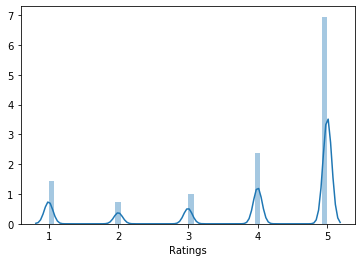

In [19]:
sns.distplot(amazon_df['Ratings'])

### Findings

1. There are 7824482 records in the dataset.
2. There are no missing elements in the dataset. 
3. There are no outliers in the Ratings column, since the total value counts add upto original number of rows.
4. There are no duplicates in the dataframe.
5. We have data of 476002 unique products sold & 4201696 unique users on Amazon.
6. Majority of the ratings are concentrated towards 5 & 4 star.

In [21]:
# Top 10 products sold and thier volume.
amazon_df['Product_Id'].value_counts().head(10)

B0074BW614    18244
B00DR0PDNE    16454
B007WTAJTO    14172
B0019EHU8G    12285
B006GWO5WK    12226
B003ELYQGG    11617
B003ES5ZUU    10276
B007R5YDYA     9907
B00622AG6S     9823
B0002L5R78     9487
Name: Product_Id, dtype: int64

In [22]:
# Top 10 users who have given ratings.
amazon_df['User_Id'].value_counts().head(10)

A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
A1ODOGXEYECQQ8    380
A36K2N527TXXJN    314
A2AY4YUOX2N1BQ    311
AWPODHOB4GFWL     308
ARBKYIVNYWK3C     296
Name: User_Id, dtype: int64

In [23]:
#Top 10 products having highest rating count
amazon_df.groupby(['Product_Id']).sum().sort_values(by='Ratings',ascending=False)[['Ratings']].head(10)

,Ratings
Product_Id,
B0074BW614,81943.0
B00DR0PDNE,64681.0
B007WTAJTO,62697.0
B0019EHU8G,58409.0
B006GWO5WK,52751.0
B003ELYQGG,51028.0
B003ES5ZUU,48346.0
B007R5YDYA,46473.0
B00622AG6S,43419.0


### 2. Take a subset of the dataset to make it less sparse/ denser. ( For example, keep the users only who has given 50 or more number of ratings )

In [143]:
user_group = amazon_df['User_Id'].value_counts()
user_group= user_group.reset_index()

In [144]:
user_group.rename(columns={'index': 'User_Id', 'User_Id':'Count'}, inplace= True)

In [145]:
user_group.head()

,User_Id,Count
0,A5JLAU2ARJ0BO,520
1,ADLVFFE4VBT8,501
2,A3OXHLG6DIBRW8,498
3,A6FIAB28IS79,431
4,A680RUE1FDO8B,406


In [146]:
user_group= user_group[user_group['Count'] > 50]

In [147]:
data_final = pd.merge(left= amazon_df, right= user_group, left_on='User_Id', right_on='User_Id')
data_final.head(10)

,User_Id,Product_Id,Ratings,count,Count
0,A100UD67AHFODS,B00004Z5M1,5.0,1,116
1,A100UD67AHFODS,B00005T3X7,5.0,1,116
2,A100UD67AHFODS,B000069EUW,5.0,1,116
3,A100UD67AHFODS,B000069JWX,1.0,1,116
4,A100UD67AHFODS,B0000AR0I4,5.0,1,116
5,A100UD67AHFODS,B0001D3K8A,5.0,1,116
6,A100UD67AHFODS,B000233WJ6,5.0,1,116
7,A100UD67AHFODS,B0002HJGUQ,5.0,1,116
8,A100UD67AHFODS,B0002KVQBA,5.0,1,116
9,A100UD67AHFODS,B0002SQ2P2,5.0,1,116


In [148]:
data_final.shape

(122171, 5)

### 3. Build Popularity Recommender model.

In [149]:
data_final.groupby(['Product_Id']).sum().sort_values(by='Ratings',ascending=False)[['Ratings']].head(10)

,Ratings
Product_Id,
B0088CJT4U,860.0
B003ES5ZUU,860.0
B000N99BBC,778.0
B007WTAJTO,732.0
B00829TIEK,647.0
B00829THK0,582.0
B008DWCRQW,552.0
B004CLYEDC,546.0
B002R5AM7C,523.0


### 4. Split the data randomly into train and test dataset. ( For example, split it in 70/30 ratio)

In [150]:
from surprise.model_selection import train_test_split
from surprise import Dataset  
import random 
from surprise import Reader, Dataset

In [151]:
reader = Reader()
data = Dataset.load_from_df(data_final[['User_Id', 'Product_Id', 'Ratings']], reader)

In [152]:
train_set, test_set = train_test_split(data, test_size=.30)

### 5. Build Collaborative Filtering model.

In [154]:
from surprise import SVD, accuracy

In [155]:
algo = SVD()
algo.fit(train_set)

In [156]:
predictions = algo.test(test_set)

### 6. Evaluate the above model. ( Once the model is trained on the training data, it can be used to compute the error (like RMSE) on predictions made on the test data.) You can also use a different method to evaluate the models.

In [157]:
from surprise import accuracy
accuracy.rmse(predictions)

RMSE: 0.9780


0.9779562264656189

In [158]:
#Example of the prediction for a user who has not rated a product and what the other users have rated and will be rated by the model
uid = str('A3CG93783LP0FO')
iid = str('B00IOQOABM')
pred = algo.predict(uid, iid, verbose=True)

user: A3CG93783LP0FO item: B00IOQOABM r_ui = None   est = 4.21   {'was_impossible': False}


In [161]:
##B00IOQOABM Product not rated by the user A3CG93783LP0FO
data_final[(data_final['User_Id'] == 'A3CG93783LP0FO') & (data_final['Product_Id'] == 'B00IOQOABM')]

,User_Id,Product_Id,Ratings,count,Count


In [162]:
#B00IOQOABM Product not rated by the user A3CG93783LP0FO
data_final[data_final['Product_Id'] == 'B00IOQOABM']

,User_Id,Product_Id,Ratings,count,Count


Evaluate against other models [KNNWithMeans, BaselineOnly]

In [163]:
from surprise import KNNWithMeans, BaselineOnly

In [164]:
from surprise.model_selection.validation import cross_validate

In [165]:
test_set_df = pd.DataFrame(test_set)

In [166]:
test_set_df.columns = ['User_Id', 'Product_Id', 'Ratings']

In [167]:
test_data = Dataset.load_from_df(test_set_df[['User_Id', 'Product_Id', 'Ratings']], reader)

In [168]:
benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(), KNNWithMeans(), BaselineOnly()]:
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=3, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)
    
pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')   

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...


,test_rmse,fit_time,test_time
Algorithm,,,
BaselineOnly,0.979008,0.349116,0.410549
SVD,0.982545,4.508697,0.788666
KNNWithMeans,1.063629,0.159234,0.735590


Conclusion: 

Out of the 3 models, BaselineOnly model gives us the best RMSE metric

### 7. Get top - K ( K = 5) recommendations. Since our goal is to recommend new products to each user based on his/her habits, we will recommend 5 new products.

In [169]:
#Use a sample of the dataset of users who have given a cummulative rating of 500. Avoid running out of memor           
reader = Reader()
data = Dataset.load_from_df(data_final[['User_Id', 'Product_Id', 'Ratings']], reader)

In [170]:
trainset_SVD = data.build_full_trainset()
algo = SVD()
algo.fit(trainset_SVD)

In [171]:
testset = trainset_SVD.build_anti_testset()

In [172]:
predictions = algo.test(testset)

In [173]:
from collections import defaultdict

In [174]:
def get_top_n(predictions, n=5):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [175]:
top_n = get_top_n(predictions, n=5)

In [176]:
#Get the products and the ratings (estimated by the model) for the user 'A17HMM1M7T9PJ1'
top_n.get('A3TAS1AG6FMBQW')

[('B0002SQ2P2', 5),
 ('B00108UNEY', 5),
 ('B002Y6CJJ8', 5),
 ('B00483WRZ6', 5),
 ('B0054JJ0QW', 5)]

In [177]:
# Print the recommended items for each user
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

A100UD67AHFODS ['B000VX6XL6', 'B002VPE1X4', 'B003ES5ZUU', 'B000N99BBC', 'B002TLTE6Y']
A100WO06OQR8BQ ['B000P6R6CY', 'B00GK22DF2', 'B00IVFDZBC', 'B001W28L2Y', 'B007FGYZFI']
A105S56ODHGJEK ['B000JV9LUK', 'B003ES5ZR8', 'B001OC6DCW', 'B00029U1DK', 'B0046TJG1U']
A105TOJ6LTVMBG ['B001DJ64D4', 'B001TH7GSW', 'B001UI2FPE', 'B008EQZ25K', 'B002TMRZOQ']
A10AFVU66A79Y1 ['B0007QKMQY', 'B000JV9LUK', 'B008JJLW4M', 'B004ELA0SS', 'B00BUJBHGG']
A10H24TDLK2VDP ['B000VX6XL6', 'B00029U1DK', 'B0019EHU8G', 'B005J4C820', 'B0074FGLUM']
A10NMELR4KX0J6 ['B003S5SOLG', 'B0002D6QJO', 'B00316263Y', 'B002TLTE6Y', 'B000N99BBC']
A10O7THJ2O20AG ['B00004Z5M1', 'B000233WJ6', 'B0002SQ2P2', 'B000ERAOL4', 'B000LRMS66']
A10PEXB6XAQ5XF ['B0010Z28XG', 'B003CFATT2', 'B00D5Q75RC', 'B0000BZL5A', 'B00D6XW62I']
A10X9ME6R66JDX ['B0054JJ0QW', 'B00A83I8G2', 'B00F0DD0I6', 'B0002LEMWE', 'B003ES5ZUU']
A10Y058K7B96C6 ['B0002LEMWE', 'B000QUUFRW', 'B0046TJG1U', 'B0052SCU8U', 'B001UI2FPE']
A10ZBR6O8S8OCY ['B00108UNEY', 'B001W26TIW', 'B002Y6CJJ

A4U27URFECK1U ['B003ZSHNGS', 'B005ES0YYA', 'B001QUA6RA', 'B000M2TAN4', 'B00D50UNRM']
A4UGMKUSX9XHI ['B0002SQ2P2', 'B002Y6CJJ8', 'B005PQTYHE', 'B0082E9K7U', 'B0097BEF1S']
A4WEZJOIZIV4U ['B001342KM8', 'B00029U1DK', 'B0019EHU8G', 'B002WE0QN8', 'B005ES0YYA']
A506HOOCVL8GW ['B001W26TIW', 'B005OA3BSY', 'B005PQTYHE', 'B0082E9K7U', 'B0097BEF1S']
A51OFQVC6O5YL ['B0019EHU8G', 'B0002D6QJO', 'B0052SCU8U', 'B0010Z28XG', 'B003CFATT2']
A54S9CIUV5VNB ['B001342KM8', 'B002TLTE6Y', 'B006W8U2MU', 'B00E3W15P0', 'B000S5Q9CA']
A54SG05AV6S4H ['B000069EUW', 'B0000AR0I4', 'B000233WJ6', 'B0002SQ2P2', 'B000ERAOL4']
A57Q87B0TC9IJ ['B0000BZL1P', 'B00029U1DK', 'B002PU9SQU', 'B00D1GYNT4', 'B007R5YDYA']
A5A4374R8I7NB ['B00029U1DK', 'B009NB8WR0', 'B008EQZ25K', 'B000M2TAN4', 'B00BQ4F9ZA']
A5CDMTW6JKV5G ['B00108UNEY', 'B001A5FH9S', 'B002Y6CJJ8', 'B003O8682Y', 'B00483WRZ6']
A5GPH59NDWJRB ['B00IVPU6AA', 'B000FQ2JLW', 'B0007QKMQY', 'B008EQYRRY', 'B00CKAOJA0']
A5JLAU2ARJ0BO ['B00006HSYC', 'B00829TIA4', 'B001J8BPYM', 'B002WE0

In [180]:
# User Id = A3TAS1AG6FMBQW 
# Product Ids [B0002SQ2P2','B00108UNEY','B002Y6CJJ8','B00483WRZ6','B0054JJ0QW']
data_final[(data_final['User_Id'] == 'A3TAS1AG6FMBQW')
                            & (data_final['Product_Id'] == 'B0002SQ2P2')
                            & (data_final['Product_Id'] == 'B00108UNEY')
                            & (data_final['Product_Id'] == 'B002Y6CJJ8')
                            & (data_final['Product_Id'] == 'B00483WRZ6')
                            & (data_final['Product_Id'] == 'B0054JJ0QW')]

,User_Id,Product_Id,Ratings,count,Count


### 8. Summarise your insights.

For the user A3TAS1AG6FMBQW, the 5 products recommended by the model are new products which are not already rated by the user. We will recommend these  5 products for the user -
User Id = A3TAS1AG6FMBQW 
Product Ids ['B0002SQ2P2', 'B00108UNEY', 'B002Y6CJJ8', 'B00483WRZ6', 'B0054JJ0QW']

We can see the estimated rating given by the model below (stored in defaultdict)

[('B0002SQ2P2', 5),
 ('B00108UNEY', 5),
 ('B002Y6CJJ8', 5),
 ('B00483WRZ6', 5),
 ('B0054JJ0QW', 5)]